C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

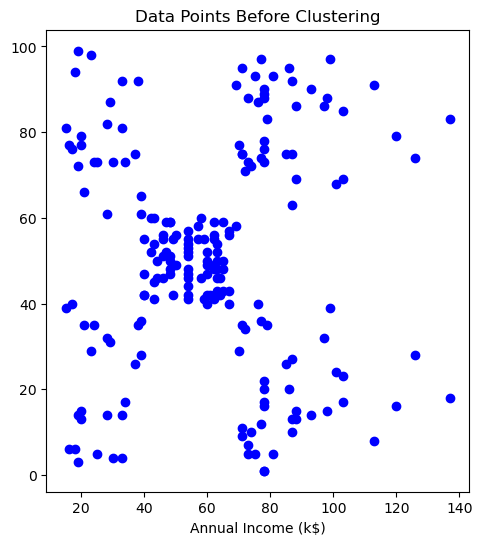

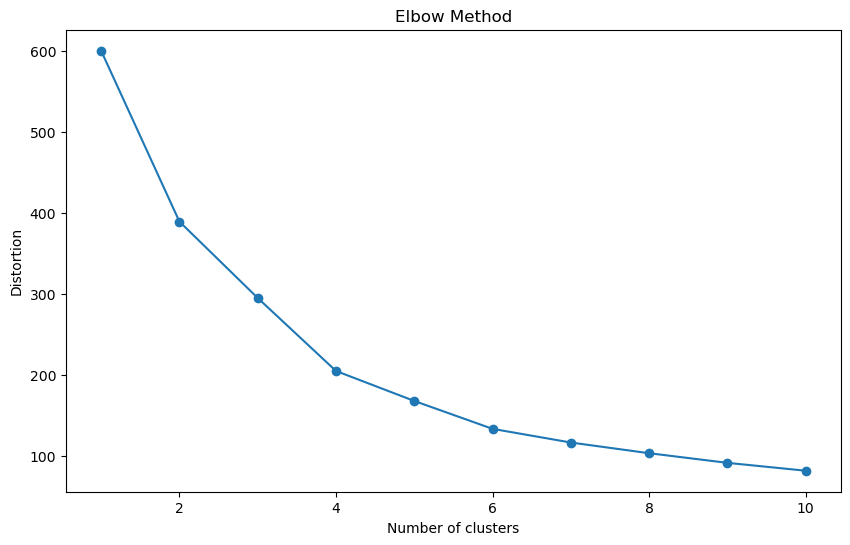

In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set OMP_NUM_THREADS to 1 to avoid memory leak on Windows with MKL which is not being removed yet
os.environ['OMP_NUM_THREADS'] = '1'

df = pd.read_csv('Mall_Customers.csv')

X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='blue', label='Before Clustering')
plt.title('Data Points Before Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

distortions = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()


C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


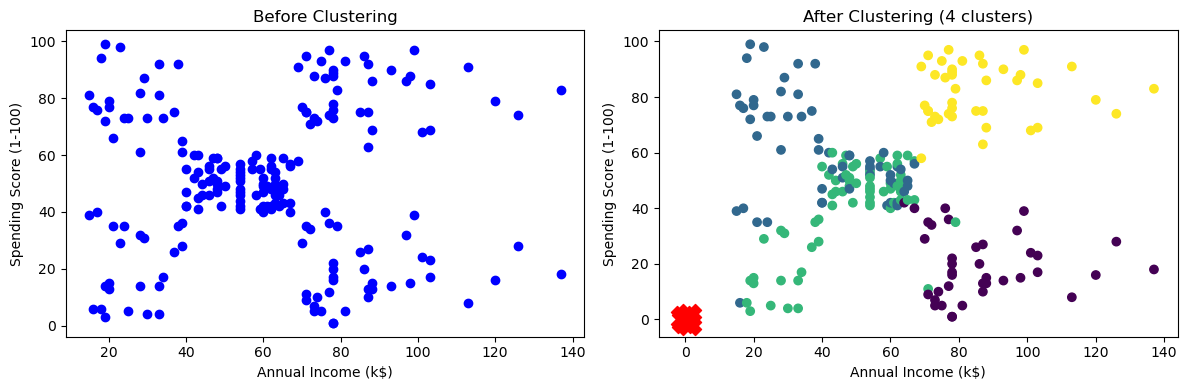

In [10]:
df = pd.read_csv('Mall_Customers.csv')

X = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c='blue', label='Data Points')
plt.title('Before Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.subplot(1, 2, 2)
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['cluster'], cmap='viridis', label='Clustered Data Points')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s=300, c='red', marker='X', label='Centroids')
plt.title('After Clustering (4 clusters)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()


In [13]:
K-means clustering is an unsupervised learning algorithm, therefore, 
it doesnt have accuracy scores, test train split, or seed values in the same way as supervised learning models. 
Accuracy scores are typically used in the context of supervised learning where there are labeled data points.

SyntaxError: invalid non-printable character U+00A0 (1588455655.py, line 3)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('winequality-red.csv')

target_variable = 'quality'

X = df.drop(columns=[target_variable])
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

seed_values = [42, 123, 789]

for seed in seed_values:
    clf = RandomForestClassifier(random_state=seed)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score (Seed={seed}): {accuracy:.4f}")

Accuracy Score (Seed=42): 0.6594
Accuracy Score (Seed=123): 0.6719
Accuracy Score (Seed=789): 0.6562
